In [91]:
import pandas as pd
from data_utils import read_all_candles
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np
from submission_utils import get_submission_markowitz
import seaborn as sns

In [2]:
candles = read_all_candles("darwins_complete_2803")

Getting candles data for Darwins...: 100%|██████████| 96/96 [00:01<00:00, 48.77it/s]


In [11]:
candles = {k: v[["close"]].rename(columns={"close":k}) for k,v in candles.items()}

In [12]:
df = pd.concat(candles.values(),keys= candles.keys(),axis=1)

In [14]:
df.columns = df.columns.droplevel()

In [15]:
df.head()

,ZVQ,NCT,YAX,OOS,GFJ,FIR,USX,FSK,TMF,TDD,...,AZG,OJG,WWT,BOT,TXR,RAT,DIG,SRI,PHI,RWJ
date,,,,,,,,,,,,,,,,,,,,,
2020-06-01 00:00:00,NaN,NaN,NaN,NaN,149.8173,NaN,142.7717,NaN,NaN,NaN,...,137.4231,130.5903,NaN,NaN,NaN,NaN,137.6399,146.8946,NaN,NaN
2020-06-01 01:00:00,NaN,NaN,NaN,NaN,149.7810,NaN,143.1519,NaN,NaN,NaN,...,137.5211,130.5809,NaN,NaN,NaN,NaN,137.6992,146.9711,NaN,NaN
2020-06-01 02:00:00,NaN,NaN,NaN,NaN,149.7692,NaN,143.2499,NaN,NaN,NaN,...,137.5279,130.6156,NaN,NaN,NaN,NaN,137.7544,146.9908,NaN,NaN
2020-06-01 03:00:00,NaN,NaN,NaN,NaN,149.7919,NaN,143.1060,NaN,NaN,NaN,...,137.4713,130.7328,NaN,NaN,NaN,NaN,137.7553,146.9618,NaN,NaN
2020-06-01 04:00:00,NaN,NaN,NaN,NaN,149.7935,NaN,143.1274,NaN,NaN,NaN,...,137.4375,130.7453,NaN,NaN,NaN,NaN,137.8392,146.9661,NaN,NaN


In [24]:
df = df.pct_change()

In [25]:
df.head()

,ZVQ,NCT,YAX,OOS,GFJ,FIR,USX,FSK,TMF,TDD,...,AZG,OJG,WWT,BOT,TXR,RAT,DIG,SRI,PHI,RWJ
date,,,,,,,,,,,,,,,,,,,,,
2020-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-01 01:00:00,NaN,NaN,NaN,NaN,-0.000242,NaN,0.002663,NaN,NaN,NaN,...,0.000713,-0.000072,NaN,NaN,NaN,NaN,0.000431,0.000521,NaN,NaN
2020-06-01 02:00:00,NaN,NaN,NaN,NaN,-0.000079,NaN,0.000685,NaN,NaN,NaN,...,0.000049,0.000266,NaN,NaN,NaN,NaN,0.000401,0.000134,NaN,NaN
2020-06-01 03:00:00,NaN,NaN,NaN,NaN,0.000152,NaN,-0.001005,NaN,NaN,NaN,...,-0.000412,0.000897,NaN,NaN,NaN,NaN,0.000007,-0.000197,NaN,NaN
2020-06-01 04:00:00,NaN,NaN,NaN,NaN,0.000011,NaN,0.000150,NaN,NaN,NaN,...,-0.000246,0.000096,NaN,NaN,NaN,NaN,0.000609,0.000029,NaN,NaN


In [68]:
def _get_submissions(subm_folder, returns):
    dic_ = {}
    for folder in tqdm(os.listdir(subm_folder)):
        df = pd.read_csv(os.path.join(subm_folder, folder, "submission.csv"), parse_dates=True, index_col="eod_ts")
        dic_[folder.replace("submission_", "")] = df
    dic_["EquallyWeighted"] = _add_equally_weighted(returns, dic_)
    return dic_


In [71]:
def _add_equally_weighted(returns, submissions):
    first_date = submissions["NCO"].index.values[0]
    last_date = submissions["NCO"].index.values[-1]
    returns = returns.loc[(returns.index >= first_date) & (returns.index <= last_date) & (returns.index.isin(submissions["NCO"].index))]
    #values = [1 / returns.shape[1]]*returns.shape[1]
    d = {asset: 1 / returns.shape[1] for asset in returns.columns}
    subm = get_submission_markowitz(d, assets = [col for col in returns.columns])
    #subm.set_index("eod_ts", inplace=True)
    return subm
    

In [72]:
submissions = _get_submissions("submissions_plot/submissions_series_temporales", df)

100%|██████████| 7/7 [00:00<00:00, 17.67it/s]


In [73]:
submissions.keys()

dict_keys(['NCO', 'markowitz', 'economistnet', 'thorpenet2', 'thorpenet1', 'rl', 'HRP', 'EquallyWeighted'])

In [83]:
submissions["EquallyWeighted"].index = submissions["NCO"].index.copy()

In [84]:
def _get_returns_dict(submissions, returns):
    first_date = submissions["NCO"].index.values[0]
    last_date = submissions["NCO"].index.values[-1]
    returns = returns.loc[(returns.index >= first_date) & (returns.index <= last_date) & (returns.index.isin(submissions["NCO"].index))]
    ret_dict = {}
    for submission in tqdm(submissions, desc="Iterating over submissions"):
        df = submissions[submission]
        df.columns = [col.replace("allo_", "") for col in df.columns]
        returns_copy = returns[df.columns]
        #rets = np.dot(df.iloc[:, :].values, returns_copy.iloc[:,:].values)
        rets = df.mul(returns_copy, axis="rows").sum(axis=1)
        ret_dict[submission] = rets
    ret_df = pd.concat(ret_dict.values(), keys=ret_dict.keys(), axis=1)
    ret_df.columns = ["NCO", "Markowitz", "EconomistNet", "ThorpeNet2", "ThorpeNet1", "RL", "HRP", "EquallyWeighted"]
    return ret_df

In [85]:
ret_df = _get_returns_dict(submissions, df)

Iterating over submissions: 100%|██████████| 8/8 [00:00<00:00, 214.08it/s]


In [86]:
ret_df.head()

,NCO,Markowitz,EconomistNet,ThorpeNet2,ThorpeNet1,RL,HRP,EquallyWeighted
eod_ts,,,,,,,,
2020-08-18 00:00:00,0.000048,-0.000049,0.000040,-0.000143,-0.000072,-0.000403,-0.000106,-0.000071
2020-08-18 01:00:00,0.000157,0.000358,0.000269,0.000213,0.000212,0.000352,0.000190,0.000338
2020-08-18 02:00:00,-0.000026,-0.000086,0.000019,-0.000005,-0.000005,0.000075,-0.000014,0.000020
2020-08-18 03:00:00,0.000006,-0.000009,-0.000043,0.000002,-0.000009,0.000055,-0.000007,-0.000022
2020-08-18 04:00:00,0.000005,0.000023,-0.000033,-0.000049,-0.000031,-0.000070,-0.000032,-0.000057


In [87]:
cumret_df = ((ret_df + 1).cumprod() - 1)


In [88]:
cumret_df

,NCO,Markowitz,EconomistNet,ThorpeNet2,ThorpeNet1,RL,HRP,EquallyWeighted
eod_ts,,,,,,,,
2020-08-18 00:00:00,0.000048,-0.000049,0.000040,-0.000143,-0.000072,-0.000403,-0.000106,-0.000071
2020-08-18 01:00:00,0.000205,0.000308,0.000309,0.000070,0.000141,-0.000051,0.000083,0.000267
2020-08-18 02:00:00,0.000179,0.000222,0.000328,0.000065,0.000136,0.000024,0.000069,0.000287
2020-08-18 03:00:00,0.000185,0.000214,0.000284,0.000066,0.000127,0.000079,0.000062,0.000265
2020-08-18 04:00:00,0.000190,0.000237,0.000251,0.000018,0.000096,0.000009,0.000029,0.000208
...,...,...,...,...,...,...,...,...
2020-12-24 17:00:00,0.034415,0.008747,0.020392,0.051206,0.025537,0.010213,0.026331,0.015245
2020-12-24 18:00:00,0.034424,0.008760,0.020406,0.051251,0.025532,0.010227,0.026368,0.015267
2020-12-24 19:00:00,0.034418,0.008735,0.020373,0.051120,0.025505,0.010197,0.026328,0.015210


In [92]:
cumret_df.index.rename("DATE", inplace=True)

In [105]:
plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams['font.style'] = 'italic'
plt.style.use('seaborn-ticks')

In [106]:
from matplotlib.dates import DateFormatter
formatter = DateFormatter('%Y-%m-%d %H:%M')

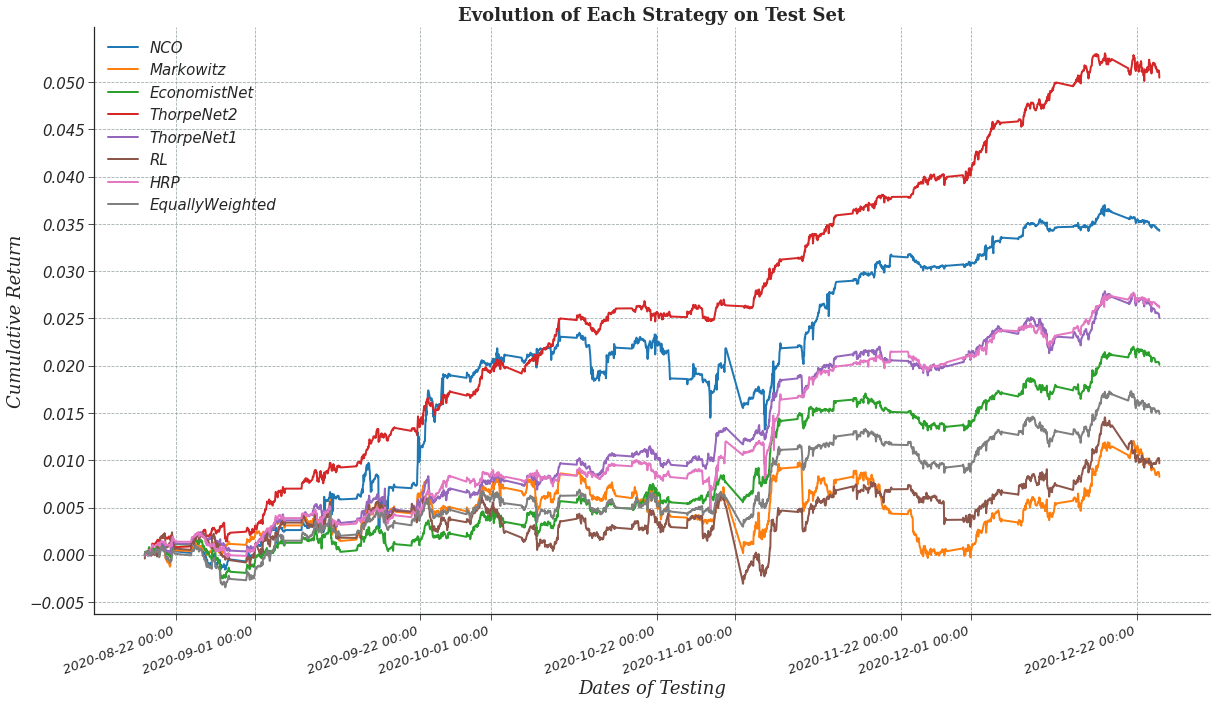

In [108]:
cumret_df.plot(**{"linewidth": 2})
sns.despine()
plt.legend(fancybox = True, prop={'size': 15})
plt.title('Evolution of Each Strategy on Test Set', size = 18, 
             fontdict = {'fontstyle' : 'normal', 'fontfamily': 'serif',# 'fontstretch': 'condensed',
                         'fontweight': 'bold',
             })
plt.xlabel('Dates of Testing', size = 18, fontdict = {'fontfamily':'serif'})
plt.ylabel('Cumulative Return', size = 18, fontdict={'fontfamily': 'serif'})
plt.grid(True, color="#93a1a1", alpha=0.9, linestyle='--')
plt.xticks(size=13, rotation=20)
plt.yticks(ticks=np.arange(-0.005, 0.055, 0.005), size = 15)
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)